In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

In [5]:
df = pd.read_csv('../../dsi_team_22/data/raw/pharma_spending_data.csv')
df.head()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76


In [6]:
#Calculate % per Capita
df['Percentage_Per_Capita'] = (df['TOTAL_SPEND'] / df['USD_CAP']) * 100

In [7]:
#Explore the Top 10 and Bottom 10 by % per Capita
#Sort the data by the new Percentage_Per_Capita column to get the top 10 and bottom 10 rows.

top_10 = df.sort_values('Percentage_Per_Capita', ascending=False).head(10)
bottom_10 = df.sort_values('Percentage_Per_Capita', ascending=True).head(10)

print("Top 10 Countries by % per capita:")
print(top_10)

print("Bottom 10 Countries by % per capita:")
print(bottom_10)

Top 10 Countries by % per capita:
    LOCATION  TIME  PC_HEALTHXP  PC_GDP   USD_CAP FLAG_CODES  TOTAL_SPEND  \
971      USA  2015       12.227   2.068  1162.399        NaN    373009.91   
970      USA  2014       11.968   1.981  1081.402        NaN    344495.16   
969      USA  2013       11.384   1.858   980.864        NaN    310154.01   
968      USA  2012       11.459   1.874   964.237        NaN    302768.85   
967      USA  2011       11.855   1.939   965.580        NaN    300935.91   
966      USA  2010       11.938   1.957   946.859        NaN    292909.12   
965      USA  2009       12.331   2.015   946.894        NaN    290480.12   
964      USA  2008       12.399   1.896   917.815        NaN    279102.00   
963      USA  2007       12.641   1.884   905.301        NaN    272704.91   
962      USA  2006       12.725   1.866   866.302        NaN    258487.11   

     Percentage_Per_Capita  
971           32089.661984  
970           31856.345744  
969           31620.490710  
96

In [9]:
#Exploring Year Ranges
# Filter data for the specified year ranges
data_1970_2015 = df[df['TIME'].between(1970, 2015)]
data_2004_2015 = df[df['TIME'].between(2004, 2015)]

# Check the data for each time range
print(data_1970_2015.head())
print(data_2004_2015.head())


  LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP FLAG_CODES  TOTAL_SPEND  \
0      AUS  1971       15.992   0.727   35.720        NaN       462.11   
1      AUS  1972       15.091   0.686   36.056        NaN       475.11   
2      AUS  1973       15.117   0.681   39.871        NaN       533.47   
3      AUS  1974       14.771   0.755   47.559        NaN       652.65   
4      AUS  1975       11.849   0.682   47.561        NaN       660.76   

   Percentage_Per_Capita  
0            1293.701008  
1            1317.700244  
2            1337.990018  
3            1372.295465  
4            1389.289544  
   LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP FLAG_CODES  TOTAL_SPEND  \
33      AUS  2004       15.656   1.269  429.882        NaN      8652.41   
34      AUS  2005       15.218   1.213  432.513        NaN      8821.02   
35      AUS  2006       15.276   1.219  461.821        NaN      9558.72   
36      AUS  2007       15.201   1.225  485.887        NaN     10119.86   
37      AUS  2008 

c:\Users\Anna\miniconda3\envs\dsi_participant\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Anna\miniconda3\envs\dsi_participant\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Anna\miniconda3\envs\dsi_participant\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Anna\miniconda3\envs\dsi_participant\lib\site-packages\statsmodels\tsa\base\

Forecasted Spending for the next 10 years: 47    28484.171008
48    28953.948259
49    29133.528584
50    29494.488121
51    29719.019801
52    30018.628803
53    30231.244108
54    30486.123639
55    30692.529245
56    30913.934280
Name: predicted_mean, dtype: float64


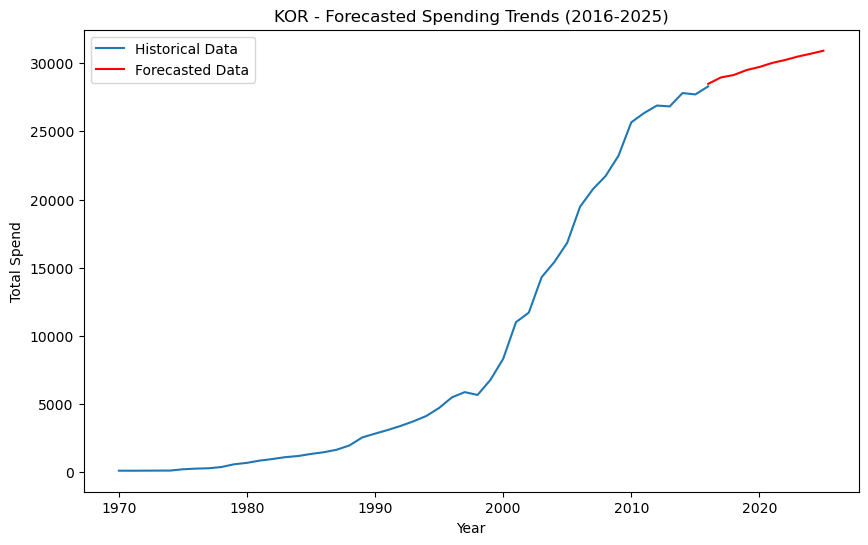

In [26]:
#Forecasting Spending Trends After 2016
# Filter data for a specific country (example: Korea - KOR) and time period
df_kor = df[df['LOCATION'] == 'KOR']
df_kor = df_kor.set_index('TIME')

# Use the 'TOTAL_SPEND' column for forecasting
y = df_kor['TOTAL_SPEND']

# Fit the ARIMA model
model = ARIMA(y, order=(5, 1, 0))  # You can adjust the order based on model performance
model_fit = model.fit()

# Forecasting the next 10 years (2016-2025)
forecast = model_fit.forecast(steps=10)
print("Forecasted Spending for the next 10 years:", forecast)

# Plot the original data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df_kor.index, df_kor['TOTAL_SPEND'], label='Historical Data')
plt.plot(np.arange(2016, 2026), forecast, label='Forecasted Data', color='red')
plt.title("KOR - Forecasted Spending Trends (2016-2025)")
plt.xlabel("Year")
plt.ylabel("Total Spend")
plt.legend()
plt.show()

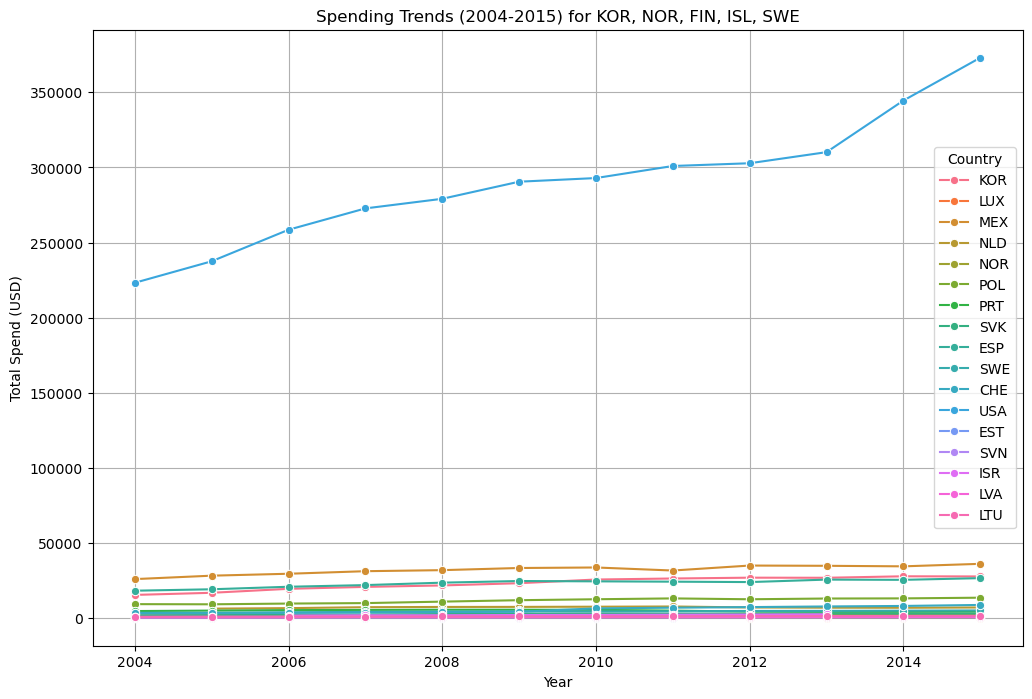

In [27]:
# Filter data for the countries of interest 
countries_of_interest = ['KOR', 'LUX', 'MEX', 'NLD', 'NOR','POL', 'PRT', 'SVK', 'ESP', 'SWE','CHE', 'TUR', 'USA', 'EST', 'SVN','ISR', 'LVA', 'LTU']
df_filtered = df[df['LOCATION'].isin(countries_of_interest) & df['TIME'].between(2004, 2015)]

# Plotting total spending over time for the selected countries
plt.figure(figsize=(12, 8))
sns.lineplot(x='TIME', y='TOTAL_SPEND', data=df_filtered, hue='LOCATION', marker='o')
plt.title("Spending Trends (2004-2015) for KOR, NOR, FIN, ISL, SWE")
plt.xlabel("Year")
plt.ylabel("Total Spend (USD)")
plt.legend(title='Country')
plt.grid(True)
plt.show()

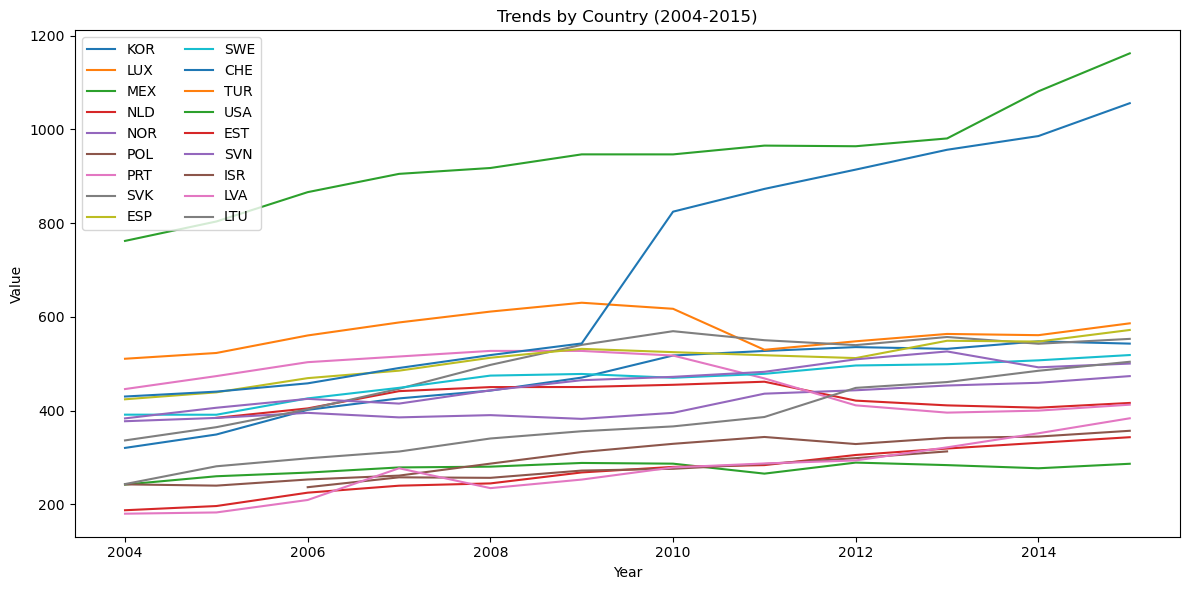

In [28]:
#Visualize trends in the filtered data
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    subset = df_filtered[df_filtered['LOCATION'] == country]
    plt.plot(subset['TIME'], subset['USD_CAP'], label=country)  # Replace 'Value' with your target column
plt.title("Trends by Country (2004-2015)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc='upper left', ncol=2)
plt.tight_layout()
plt.show()

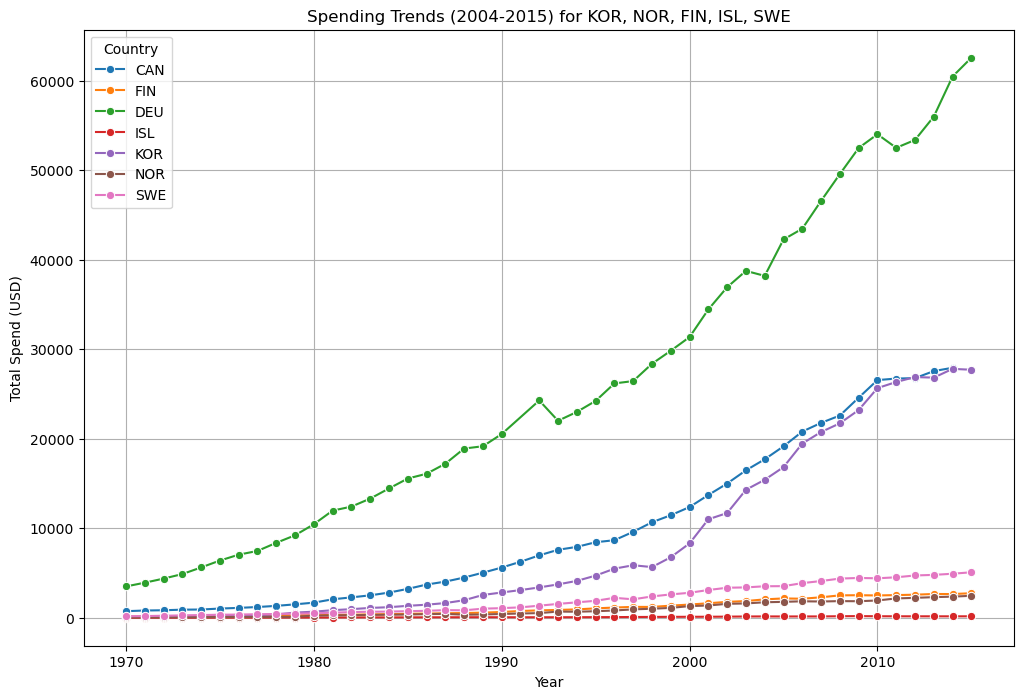

In [29]:
# Filter data for the countries of interest 
countries_of_interest = ['KOR', 'NOR', 'FIN', 'ISL', 'SWE','CAN', 'DEU']
df_filtered = df[df['LOCATION'].isin(countries_of_interest) & df['TIME'].between(1970, 2015)]

# Plotting total spending over time for the selected countries
plt.figure(figsize=(12, 8))
sns.lineplot(x='TIME', y='TOTAL_SPEND', data=df_filtered, hue='LOCATION', marker='o')
plt.title("Spending Trends (2004-2015) for KOR, NOR, FIN, ISL, SWE")
plt.xlabel("Year")
plt.ylabel("Total Spend (USD)")
plt.legend(title='Country')
plt.grid(True)
plt.show()

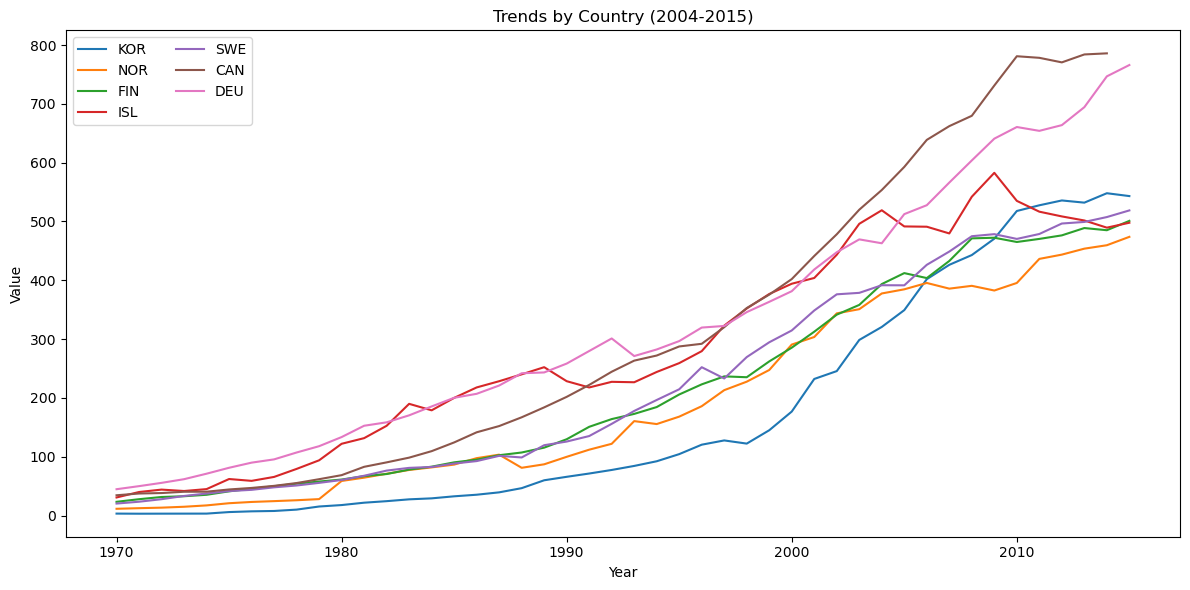

In [30]:
#Visualize trends in the filtered data
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    subset = df_filtered[df_filtered['LOCATION'] == country]
    plt.plot(subset['TIME'], subset['USD_CAP'], label=country)  # Replace 'Value' with your target column
plt.title("Trends by Country (2004-2015)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc='upper left', ncol=2)
plt.tight_layout()
plt.show()